<a href="https://colab.research.google.com/github/kl01abhinav2-coder/MY_TRAVEL/blob/add-travel-clean/Intermediate_Assessment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.svm import SVC #SVM
from sklearn.model_selection import GridSearchCV #model fine tuning
from sklearn.ensemble import RandomForestClassifier  # Model Feature Selection

#Load Data(Training Data)

In [107]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
filepath='/content/drive/MyDrive/data2/train_LZdllcl.csv'
train_data=pd.read_csv(filepath)
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#EDA

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [110]:
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
  print('Coloumn : ',col)
  print(train_data[col].value_counts(dropna=False))
print('Categorical columns:\n',cat_cols)

Coloumn :  department
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
Coloumn :  region
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
C

#Data Cleaning

In [111]:
#trn.drop(columns=['employee_id'],inplace=True)

#Handling Duplicates

In [112]:
train_data.duplicated().sum()

np.int64(0)

#Handling Missing Values

In [113]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [114]:
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])

In [115]:
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean())

In [116]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Handling Outliers

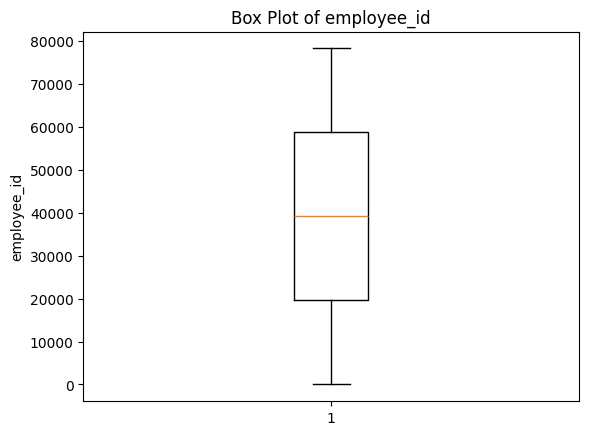

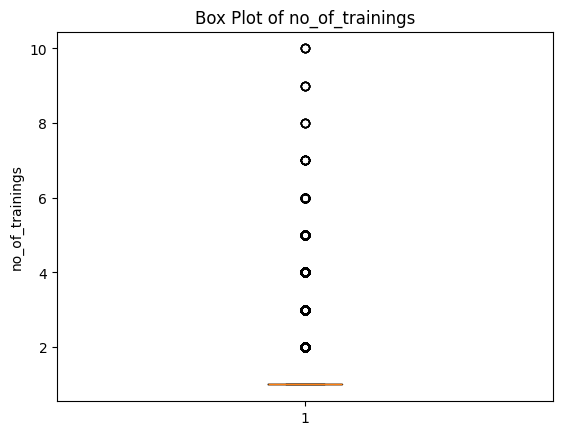

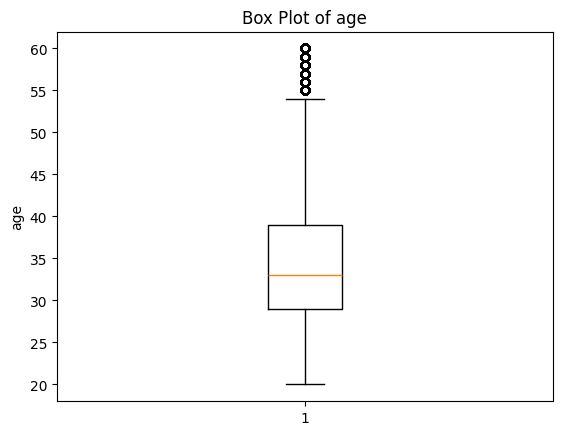

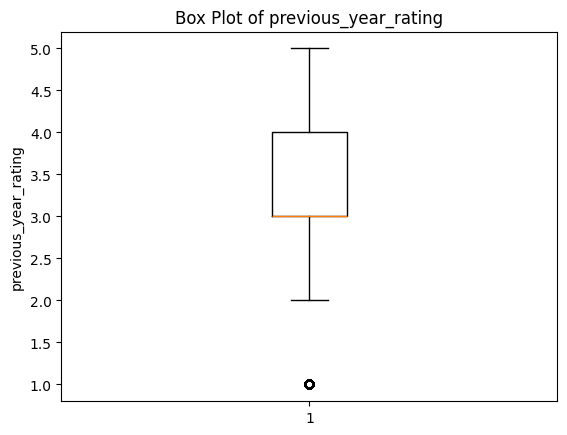

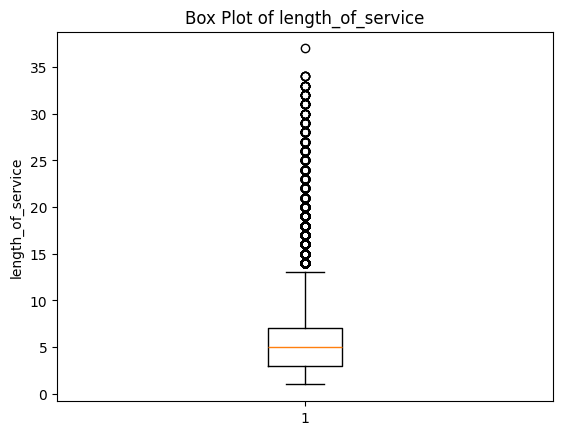

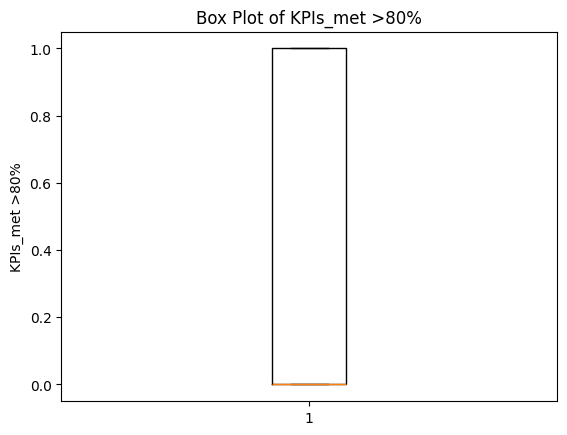

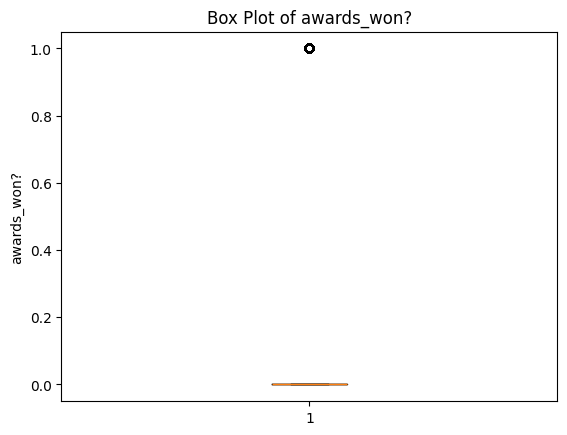

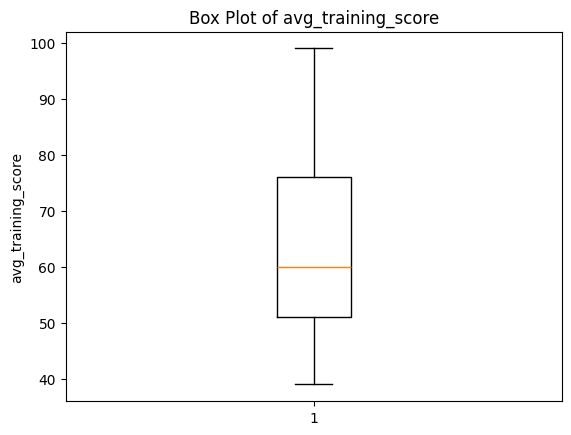

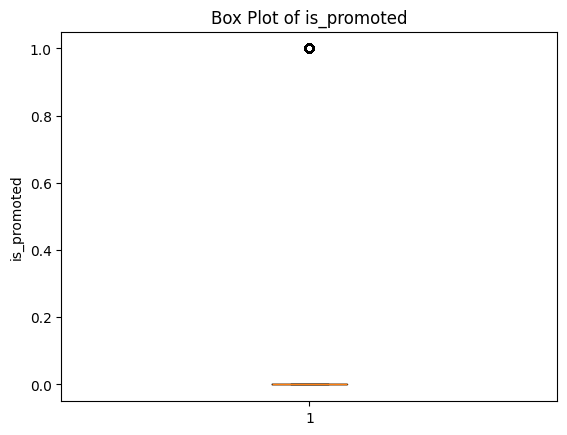

In [117]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    plt.boxplot(train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

#Feature Engineering

In [118]:
train_data1=train_data.select_dtypes(include=['number'])
corr=train_data1.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004364,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004364,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.001274,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

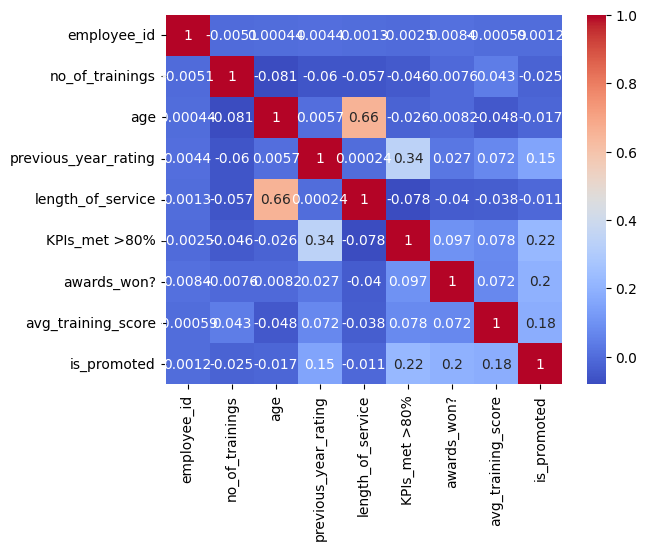

In [119]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

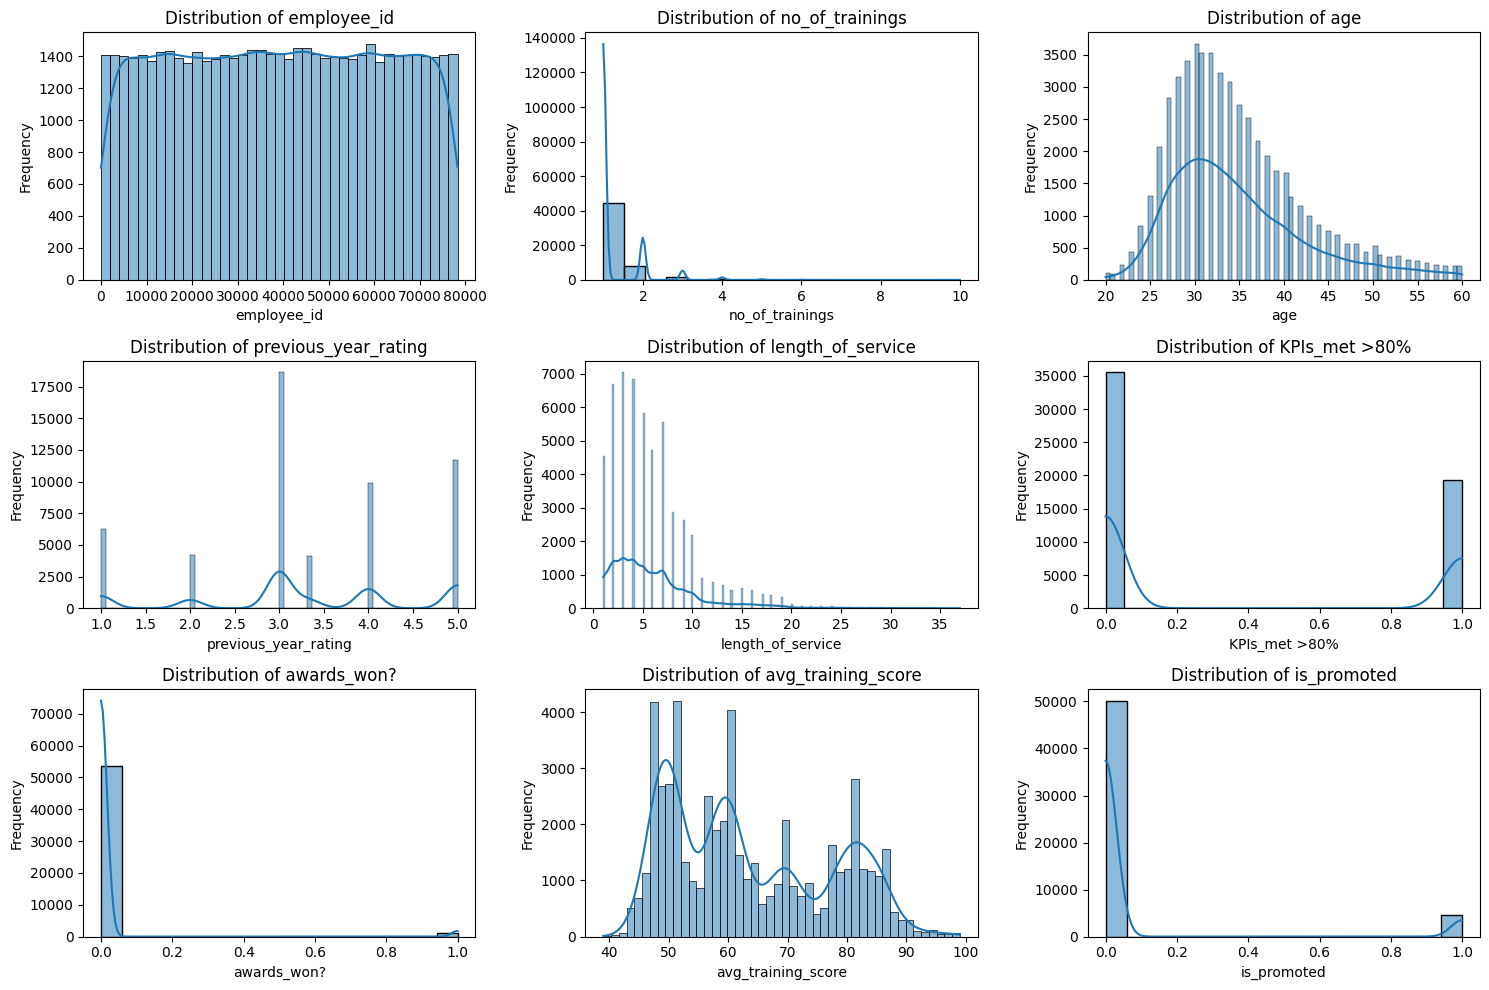

In [120]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.histplot(train_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Encoding

In [121]:
#Frequency Encoding

In [122]:
region_freq_map = train_data['region'].value_counts(normalize=True).to_dict()
train_data['region'] = train_data['region'].map(region_freq_map)

In [123]:
train_data['region'].value_counts()

,count
region,
0.225204,12343
0.117282,6428
0.088363,4843
0.051233,2808
0.048314,2648
0.041235,2260
0.035305,1935
0.031072,1703
0.030269,1659


#Label Encoding

In [124]:
label_cols = ['department', 'education', 'gender', 'recruitment_channel']

le = LabelEncoder()
for col in label_cols:
    train_data[col] = le.fit_transform(train_data[col])
display(train_data.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,0.088363,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,0.117282,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,0.015947,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,0.021438,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,0.041235,0,1,0,1,45,3.0,2,0,0,73,0


#Train-Test Split

In [125]:
train_data1=train_data.drop(columns=['employee_id'])

In [126]:
X = train_data1.drop('is_promoted', axis=1)
y = train_data1['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 12)
(10962, 12)
(43846,)
(10962,)


#Scaling

Min-Max Scaling

In [128]:
ss = MinMaxScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

#ML Modeling Using Classification Methods

1.Logistic Regression

In [129]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_pred_lr=lr.predict(X_test)

In [131]:
print(f'accuracy_score= {accuracy_score(y_test,y_pred_lr)}')
print(f'precision= {precision_score(y_test,y_pred_lr)}')
print(f'f1= {f1_score(y_test,y_pred_lr)}')
print(f'recall= {recall_score(y_test,y_pred_lr)}')
print(f'conf_matrix= {confusion_matrix(y_test,y_pred_lr)}')
print(f'classification_report= {classification_report(y_test,y_pred_lr)}')

accuracy_score= 0.9135194307608101
precision= 0.6020408163265306
f1= 0.11069418386491557
recall= 0.060950413223140494
conf_matrix= [[9955   39]
 [ 909   59]]
classification_report=               precision    recall  f1-score   support

           0       0.92      1.00      0.95      9994
           1       0.60      0.06      0.11       968

    accuracy                           0.91     10962
   macro avg       0.76      0.53      0.53     10962
weighted avg       0.89      0.91      0.88     10962



#2.KNN

Using Euclidian

In [132]:
#we need to figure out the optimum value for k.
#to do that, we will check which value of k is giving highest accuracy.

accuracy_list = []
neighbors_range = np.arange(1,30)

for k in neighbors_range:
  classifier = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier.fit(X_train, y_train)
  y_pred_eu=classifier.predict(X_test)  #predict using trained ML model
  acc = accuracy_score(y_test,y_pred_eu)  # evaluate the ML model
  accuracy_list.append(acc) #appending acc list with accuracy achieved for each value of k

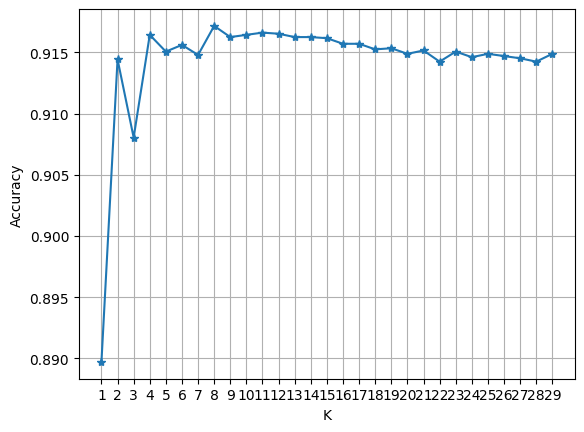

In [133]:
plt.plot(neighbors_range, accuracy_list,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()

Taking Value of k=8

In [134]:
classifier_knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
classifier_knn.fit(X_train,y_train)
y_pred_knn_eu = classifier_knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn_eu)
prec_knn=precision_score(y_test,y_pred_knn_eu)
rec_knn=recall_score(y_test,y_pred_knn_eu)
f1_knn=f1_score(y_test,y_pred_knn_eu)

In [135]:
print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)
confusion_matrix(y_test,y_pred_knn_eu)

Accuracy: 0.9171683999270206
Precision: 0.7272727272727273
Recall: 0.09917355371900827
F1 Score: 0.17454545454545456


array([[9958,   36],
       [ 872,   96]])

#Using Manhattan

In [136]:
accuracy_list1 = []
neighbors_range1 = np.arange(1,30)

for k in neighbors_range:
  classifier1 = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=1)  # initialising classifier for iteration using manhattan p=1
  #Training the ML model
  classifier1.fit(X_train, y_train)
  y_pred_mn=classifier1.predict(X_test)  #predict using trained ML model
  acc1 = accuracy_score(y_test,y_pred_mn)  # evaluate the ML model
  accuracy_list1.append(acc1) #appending acc list with accuracy achieved for each value of k

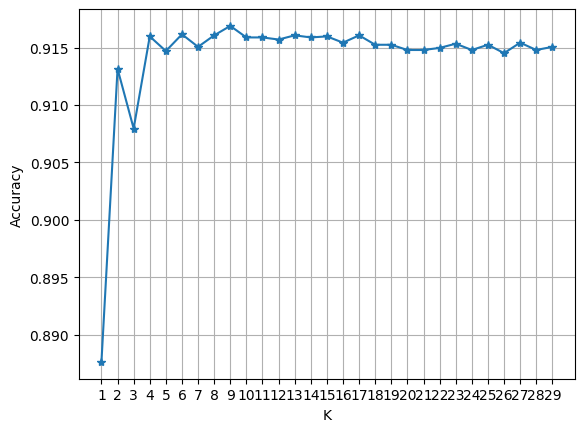

In [137]:
plt.plot(neighbors_range1, accuracy_list1,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range1)
plt.grid()

In [138]:
classifier1_knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan') #using K=9
classifier1_knn.fit(X_train,y_train)
y_pred_knn_mn = classifier1_knn.predict(X_test)
acc_knn1=accuracy_score(y_test,y_pred_knn_mn)
prec_knn1=precision_score(y_test,y_pred_knn_mn)
rec_knn1=recall_score(y_test,y_pred_knn_mn)
f1_knn1=f1_score(y_test,y_pred_knn_mn)

In [139]:
print('Accuracy:',acc_knn1)
print('Precision:',prec_knn1)
print('Recall:',rec_knn1)
print('F1 Score:',f1_knn1)
confusion_matrix(y_test,y_pred_knn_mn)

Accuracy: 0.9168947272395548
Precision: 0.6770186335403726
Recall: 0.11260330578512397
F1 Score: 0.19309123117803365


array([[9942,   52],
       [ 859,  109]])

In [140]:
#initializing the model
nb=GaussianNB()
#training the model
nb.fit(X_train,y_train)
#predict using trained ML model
y_pred_nb=nb.predict(X_test)
#evaluate the model
acc_nb=accuracy_score(y_test,y_pred_nb)
prec_nb=precision_score(y_test,y_pred_nb)
rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

In [141]:
print('Accuracy:',acc_nb)
print('Precision:',prec_nb)
print('Recall:',rec_nb)
print('F1 Score:',f1_nb)
confusion_matrix(y_test,y_pred_nb)

Accuracy: 0.9101441342820653
Precision: 0.46530612244897956
Recall: 0.11776859504132231
F1 Score: 0.18796372629843364


array([[9863,  131],
       [ 854,  114]])

In [142]:
#initializing the model
dt=DecisionTreeClassifier()
#training the model
dt.fit(X_train,y_train)
#predict using trained ML model
y_pred_dt=dt.predict(X_test)
#evaluate the model
acc_dt=accuracy_score(y_test,y_pred_dt)
prec_dt= precision_score(y_test,y_pred_dt)
rec_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)

In [143]:
print('Accuracy:',acc_dt)
print('Precision:',prec_dt)
print('Recall:',rec_dt)
print('F1 Score:',f1_dt)
confusion_matrix(y_test,y_pred_dt)

Accuracy: 0.8941798941798942
Precision: 0.4090909090909091
Recall: 0.4462809917355372
F1 Score: 0.4268774703557312


array([[9370,  624],
       [ 536,  432]])

5.SVM (SVC)

In [144]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=55)  ##initializing the model
svm_clf.fit(X_train, y_train)   ##training the model
y_pred_sv = svm_clf.predict(X_test)  ##training the model

In [145]:
#evaluating the model
acc_sv=accuracy_score(y_test,y_pred_sv)
prec_sv= precision_score(y_test,y_pred_sv)
rec_sv=recall_score(y_test,y_pred_sv)
f1_sv=f1_score(y_test,y_pred_sv)


print('Accuracy:',acc_sv)
print('Precision:',prec_sv)
print('Recall:',rec_sv)
print('F1 Score:',f1_sv)
confusion_matrix(y_test,y_pred_sv)

Accuracy: 0.914887794198139
Precision: 0.6966292134831461
Recall: 0.0640495867768595
F1 Score: 0.1173131504257332


array([[9967,   27],
       [ 906,   62]])

#KNN Model Fine Tuning using Grid Search CV

In [146]:
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'metric': ['euclidean', 'manhattan']
}

print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'metric': ['euclidean', 'manhattan']}


In [147]:
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

print("GridSearchCV for KNN initialized.")

GridSearchCV for KNN initialized.


In [148]:
grid_search_knn.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

GridSearchCV fitting complete.


In [149]:
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 4}
Best score for KNN: 0.9206084614701446


In [150]:
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("KNN (Fine-Tuned) Performance on Test Set:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_best_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_best_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_best_knn)}')
print(f'F1 Score: {f1_score(y_test, y_pred_best_knn)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best_knn))

KNN (Fine-Tuned) Performance on Test Set:
Accuracy: 0.9164386060937785
Precision: 0.634020618556701
Recall: 0.12706611570247933
F1 Score: 0.2117039586919105
Confusion Matrix:
 [[9923   71]
 [ 845  123]]


#Load Data(Testing Data)

In [151]:
from google.colab import drive
drive.mount('/content/drive')

filepath='/content/drive/MyDrive/data2/test_2umaH9m.csv'
tes=pd.read_csv(filepath)
tes.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


#Data Cleaning

In [152]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [153]:
for col in tes.columns:
    print(f"\nColumn: {col}")
    print(tes[col].value_counts(dropna=False))



Column: employee_id
employee_id
5973     1
8724     1
67979    1
29379    1
59625    1
        ..
54542    1
46232    1
64486    1
38562    1
72255    1
Name: count, Length: 23490, dtype: int64

Column: department
department
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: count, dtype: int64

Column: region
region
region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_10     269
region_8      269
region_1      238
region_24     219
regio

#Handling Missing Values

In [154]:
tes.isnull().sum().sort_values(ascending=False)

,0
previous_year_rating,1812
education,1034
employee_id,0
region,0
department,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
length_of_service,0


In [155]:
tes['education']=train_data['education'].fillna(train_data['education'].mode()[0])


In [156]:
tes['previous_year_rating']=tes['previous_year_rating'].fillna(tes['previous_year_rating'].mean())

In [157]:
tes.isnull().sum().sort_values(ascending=False)

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Encoding

Frequency encoding


In [158]:
region_freq_map = tes['region'].value_counts(normalize=True).to_dict()
tes['region'] = tes['region'].map(region_freq_map)

In [159]:
tes['region'].value_counts()

,count
region,
0.225585,5299
0.116603,2739
0.084376,1982
0.049681,1167
0.048106,1130
0.043040,1011
0.035930,844
0.032993,775
0.030226,710


Label encoding

In [160]:
for col in label_cols:
    tes[col] = le.fit_transform(tes[col])

In [161]:
tes.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,0.043040,2,1,2,1,24,3.339146,1,1,0,77
1,74430,2,0.032993,0,0,0,1,31,3.000000,5,0,0,51
2,72255,7,0.049681,0,1,0,1,31,1.000000,4,0,0,47
3,38562,5,0.225585,0,0,0,3,31,2.000000,9,0,0,65
4,64486,1,0.017625,0,1,2,1,30,4.000000,7,0,0,61


#Scaling

Min-Max Scaling

In [162]:
tes = tes.drop(columns=['employee_id'])

In [163]:
tes=ss.transform(tes)

#ML Modeling using fine tuned Logistic Regression

In [169]:
y_pred_tes=best_knn.predict(tes)

#Create submission file

In [170]:
sample_sub = pd.read_csv('/content/drive/MyDrive/data2/sample_submission_M0L0uXE.csv')
sample_sub['is_promoted'] = y_pred_tes

In [172]:
sample_sub.to_csv('final_1_submission.csv', index=False)
